In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt

### Check runner 

In [2]:
import runner
import fittingAlgorithm

In [3]:
yamlFile = "inputParams.yaml"
varDict = fittingAlgorithm.YamlToParamDict(yamlFile)
varDict['kon'] = 5.0
varDict['koff'] = 1.0
newDict = runner.simulation(varDict=varDict)

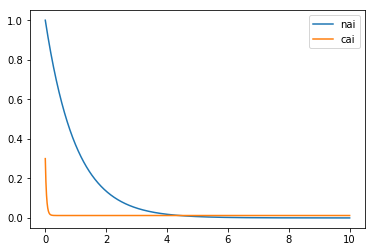

In [4]:
data = newDict['data']
plt.plot(data['t'],data['Nai'],label="nai")
plt.plot(data['t'],data['Cai'],label="cai")
plt.legend()

### CHeck main IO routines 

In [5]:
import analyze

In [6]:
dataSub = analyze.GetData(data,"Nai")

In [7]:
result = analyze.ProcessDataArray(dataSub,"mean",[8,10],None,"Nai")

In [8]:
print(result)

0.000145963697871


### Check sampler 

In [10]:
fittingAlgorithm.validation()


Fixing random seed

timeRange:  [0.0, 3.0]
Generating single-variable output list
WHY is this wrapper needed
iter 1  out of 10
Inputs:  kon 5.0
Using 3 cores for 3 jobs
Should probably rescale sigma by the tolerated error vs current error and only for selected params 
Multi-threading
Worker bee 32285, Job 2 
Worker bee 32284, Job 1 
Worker bee 32283, Job 0 
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636ec1e48>}
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636ec1f28>}
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636d8a080>}
result:  0.14305658358422646 truthValue:  0.1
result:  0.0030206064429950195 truthValue:  0.1
result:  0.0008873128386769079 truthValue:  0.1
myDataFrame: 
           Container    jobID jobNum       kon   fitness
0_32283     0.143057  0_32283      0  0.227328  0.656175
1_32284   0.00302061  1_32284      1   20.9052  0.984781
2_32285  0.000887313  2_32285      2   71.7086  0.995554
jobFitnes

Worker bee 32431, Job 0 
Worker bee 32433, Job 2 
Worker bee 32432, Job 1 
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636e64048>}
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636e646d8>}
outputList:  {'Container': <fittingAlgorithm.OutputObj object at 0x7fb636e645f8>}
result:  0.1014081294597548 truthValue:  0.1
result:  0.0977286245746162 truthValue:  0.1
result:  0.09578608775774798 truthValue:  0.1
myDataFrame: 
         Container    jobID jobNum       kon   fitness
0_32431   0.101408  0_32431      0  0.408018  0.118665
1_32432  0.0977286  1_32432      1  0.431514  0.150711
2_32433  0.0957861  2_32433      2  0.444655  0.205278
jobFitnesses:  [ 0.11866463  0.15071083  0.20527816]
jobIndex:  0
bestVarDict:  {'kon': 0.40801842400626342}
currentFitness 0.118664630777
iter 9  out of 10

######

iter 10  out of 10
Inputs:  kon 0.408018424006
Using 3 cores for 3 jobs
Should probably rescale sigma by the tolerated error vs current error a

In [11]:
## Spot check 

In [12]:
yamlFile = "inputParams.yaml"
varDict = fittingAlgorithm.YamlToParamDict(yamlFile)
varDict['kon'] = 5.0
varDict['koff'] = 1.0
print(varDict)
bestDict = runner.simulation(varDict=varDict)

{'kon': 5.0, 'koff': 1.0, 'bMax': 5.0, 'scale': 0.0001}


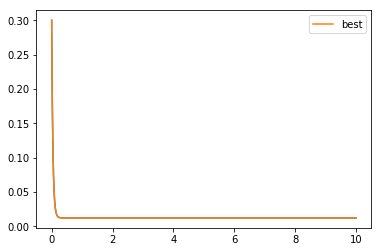

In [13]:
data = newDict['data']
#plt.plot(data['t'],data['Nai'])
plt.plot(data['t'],data['Cai'])
data = bestDict['data']
plt.plot(data['t'],data['Cai'],label="best")
plt.legend()

### Fitting against non-scalar data

In [24]:
import fittingAlgorithm as fA
from fittingAlgorithm import OutputObj

# file with default parameters for model
yamlVarFile = "inputParams.yaml"
fixedParamDict = fA.YamlToParamDict(yamlVarFile)

# parameters you want to vary 
variedParamList= { 
  # paramDict[myVariedParam] = [variedParamTruthVal, 0.2] # for log normal
  #"kon":  [0.4,0.2],
  "scale":  [1,0.2],
} 

# list of observables to be scored by GA 
outputList = { 
    #"Cai":OutputObj("Cai","mean",[8,10], # in [s]
    # 0.1),          # value you want 
    "Nai":OutputObj("Nai","val_vs_time",[  0, 2],
    [1,0.5,0.15],timeInterpolations=[  0,1,2]) # check that interpolated values at 0, 100, 200 are 1, 0.5 ... 
}

In [25]:
print(type(outputList["Nai"].timeInterpolations))
print(type(outputList["Nai"].truthValue))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
fA.run(
    yamlVarFile="inputParams.yaml",
    variedParamDict = variedParamList,
    outputList = outputList,
    numRandomDraws = 3,
    numIters = 2
    
)

timeRange:  [0.0, 30.0]
WHY is this wrapper needed
iter 1  out of 2
Inputs:  scale 1
Using 3 cores for 3 jobs
Should probably rescale sigma by the tolerated error vs current error and only for selected params 
Multi-threading
Worker bee 3500, Job 0 
Worker bee 3501, Job 1 
Worker bee 3502, Job 2 
outputList:  {'Nai': <fittingAlgorithm.OutputObj object at 0x7fb636e332b0>}
outputList:  {'Nai': <fittingAlgorithm.OutputObj object at 0x7fb636e336a0>}
outputList:  {'Nai': <fittingAlgorithm.OutputObj object at 0x7fb636e331d0>}
result:  [ 1.          0.40752799  0.16727598] truthValue:  [ 1.    0.5   0.15]
result:  [ 1.          0.34662286  0.12116992] truthValue:  [ 1.    0.5   0.15]
result:  [ 1.          0.31595781  0.10075346] truthValue:  [ 1.    0.5   0.15]
myDataFrame: 
                                          Nai   jobID jobNum     scale  \
0_3500  [1.0, 0.407527988827, 0.167275984054]  0_3500      0  0.897649   
1_3501  [1.0, 0.346622856254, 0.121169923601]  1_3501      1   1.05952  

{'allDraws': [array([ 0.89764931,  1.05952304,  1.15215258]),
  array([ 0.92966489,  1.03769935,  1.35561103])],
 'bestDraws': [{'scale': 0.89764930647476393}, {'scale': 0.89764930647476393}],
 'bestFitDict': {'scale': 0.89764930647476393},
 'bestFitness': 0.28877901723442673,
 'outputList': {'Nai': <fittingAlgorithm.OutputObj at 0x7fb636e1bf28>}}